In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import statsmodels.formula.api as smf

# Standard plotly imports
import chart_studio.plotly as py
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.offline import iplot, init_notebook_mode, plot
# Using plotly + cufflinks in offline mode
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('data_files/Berechnung_dCS.csv')

In [3]:
df.head()

,C,S,T,A,Alpha,Theta,beta,dC,dS,zz,dCS
0,27.1,-8.2,-29.7,28.0,-15.7,135.8,40.6,33.0,20.00,11.4,38.59
1,25.5,-17.3,-29.7,29.7,-33.1,134.1,41.7,6.0,8.00,24.4,10.00
2,22.0,-17.3,-29.7,27.0,-37.6,136.8,40.0,1.0,8.59,29.3,8.65
3,21.5,-16.5,-29.7,26.2,-36.9,137.7,39.4,0.0,7.00,28.5,7.00
4,22.0,-16.0,-29.7,25.6,-36.8,138.4,39.0,0.0,7.00,29.2,7.00


In [9]:
df['dCS'].iplot(size=0, kind='hist', xTitle='degrees',
yTitle='count', title='dCS Distribution')
plt.show()

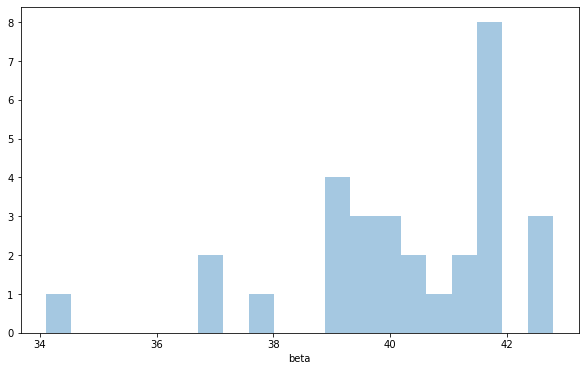

In [11]:
plt.figure(figsize=[10,6])
sns.distplot(df['beta'], kde=False, bins=20)
plt.show()

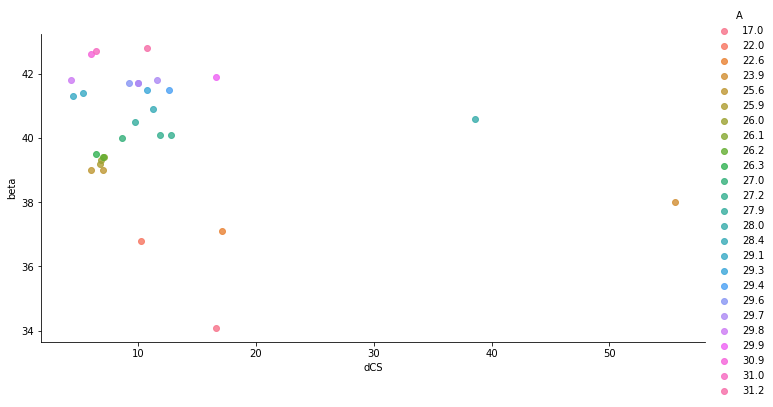

In [24]:
sns.lmplot('dCS', 'beta', data=df, fit_reg= False, aspect=2, size =5, hue='A')
plt.show()

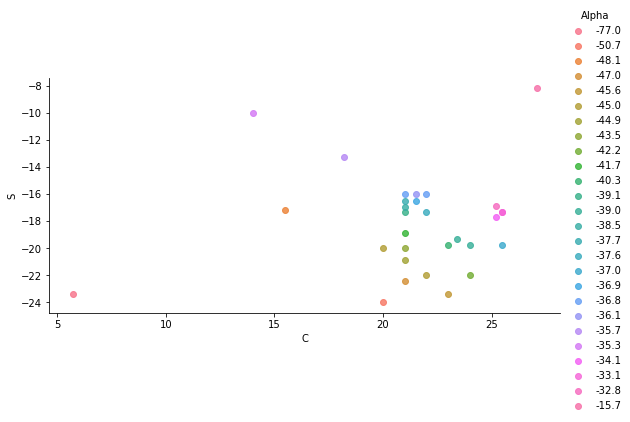

In [19]:
sns.lmplot('C', 'S', data=df, fit_reg= False, aspect=2, size =4, hue='Alpha')
plt.show()

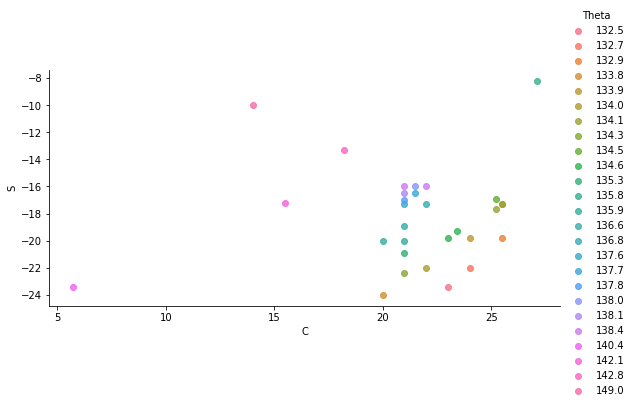

In [23]:
sns.lmplot('C', 'S', data=df, fit_reg= False, aspect=2, size =4, hue='Theta')
plt.show()

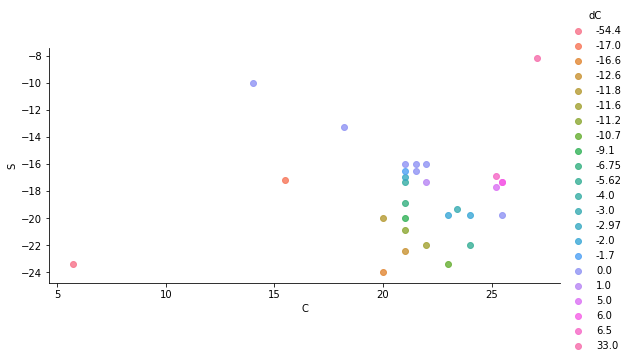

In [25]:
sns.lmplot('C', 'S', data=df, fit_reg= False, aspect=2, size =4, hue='dC')
plt.show()

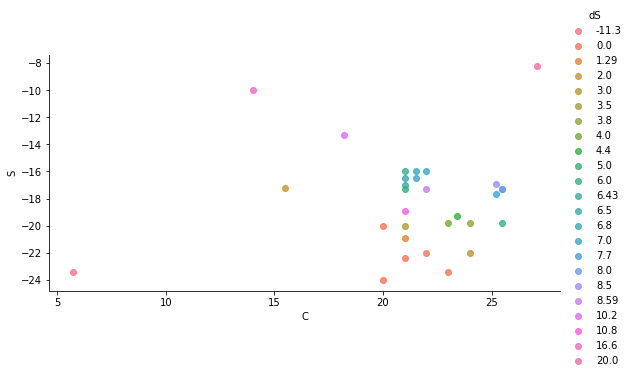

In [28]:
sns.lmplot('C', 'S', data=df, fit_reg= False, aspect=2, size =4, hue='dS')
plt.show()

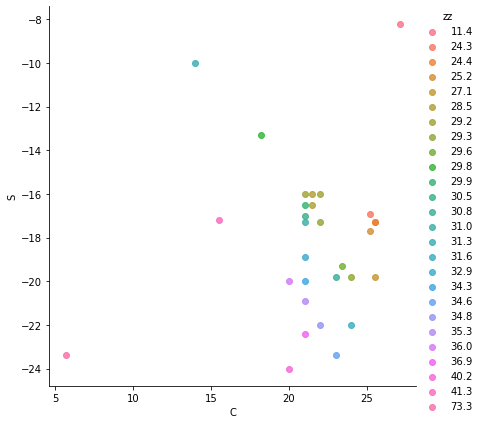

In [32]:
sns.lmplot('C', 'S', data=df, fit_reg= False, aspect=1, size =6, hue='zz')
plt.show()

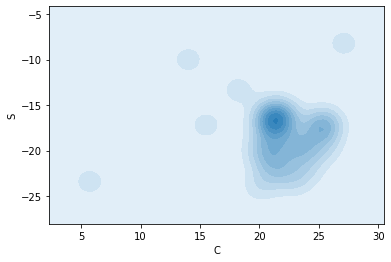

In [36]:
sns.kdeplot(df['C'], df['S'], shade=True)
plt.show()

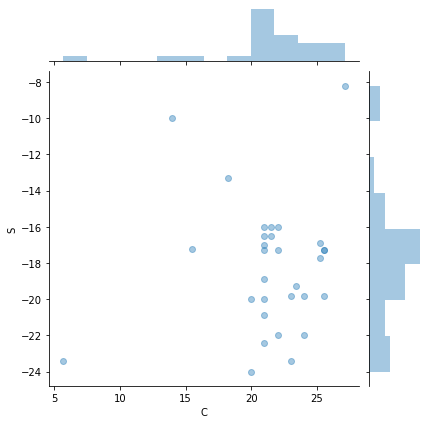

In [37]:
sns.jointplot('C', 'S', data=df, alpha=0.4)
plt.show()

In [38]:
df.iplot(
x='dC',
y='dS',
# Specify the category
categories='S',
xTitle='dC',
yTitle='dS',
title='Abweichungen dC und dS in Abhängigkeit von S')
plt.show()

In [39]:
df.iplot(
x='dC',
y='dS',
# Specify the category
categories='C',
xTitle='dC',
yTitle='dS',
title='Abweichungen dC und dS in Abhängigkeit von C')
plt.show()

In [40]:
figure = ff.create_scatterplotmatrix(
df[['C','S','T','A','Alpha','Theta','beta','dC','dS', 'zz', 'dCS']],
width=2000, height=2000,
diag='histogram',
index='zz')
plot(figure, filename='plotly_scatterplot_zz.html')
figure.show()

In [ ]:
figure = ff.create_scatterplotmatrix(
df[['C','S','T','A','Alpha','Theta','beta','dC','dS', 'zz', 'dCS']],
width=2000, height=2000,
diag='histogram',
index='dS')
plot(figure, filename='plotly_scatterplot_dS.html')
figure.show()

In [ ]:
# figure = ff.create_scatterplotmatrix(
# df[['C','S','T','A','Alpha','Theta','beta','dC','dS']],
# width=2000, height=2000,
# diag='histogram',
# index='A')
# plot(figure, filename='plotly_scatterplot_A.html')
# figure.show()

In [ ]:
# figure = ff.create_scatterplotmatrix(
# df[['C','S','T','A','Alpha','Theta','beta','dC','dS']],
# width=2000, height=2000,
# diag='histogram',
# index='Alpha')
# plot(figure, filename='plotly_scatterplot_Alpha.html')
# figure.show()

In [ ]:
# figure = ff.create_scatterplotmatrix(
# df[['C','S','T','A','Alpha','Theta','beta','dC','dS']],
# width=2000, height=2000,
# diag='histogram',
# index='beta')
# plot(figure, filename='plotly_scatterplot_beta.html')
# figure.show()

In [ ]:
# figure = ff.create_scatterplotmatrix(
# df[['C','S','T','A','Alpha','Theta','beta','dC','dS']],
# # df[['C','S','A','Alpha','Theta','dC']],
# width=2000, height=2000,
# diag='histogram',
# index='C')
# plot(figure, filename='plotly_scatterplot_C.html')
# figure.show()

In [ ]:
# figure = ff.create_scatterplotmatrix(
# df[['C','S','T','A','Alpha','Theta','beta','dC','dS']],
# width=2000, height=2000,
# diag='histogram',
# index='S')
# plot(figure, filename='plotly_scatterplot_S.html')
# figure.show()

In [ ]:
# figure = ff.create_scatterplotmatrix(
# df[['C','S','T','A','Alpha','Theta','beta','dC','dS']],
# # df[['C','S','A','Alpha','Theta','dC']],
# width=2000, height=2000,
# diag='histogram',
# index='T')
# plot(figure, filename='plotly_scatterplot_T.html')
# figure.show()

In [ ]:
# g = sns.PairGrid(df, diag_sharey=False)
# g.map_lower(sns.kdeplot, )
# g.map_upper(plt.scatter)
# g.map_diag(sns.kdeplot)
# plt.show()
# g.savefig("pair_grid_C_S")

In [ ]:
sns.countplot(y = 'C', data=df)
plt.show()

In [ ]:
sns.countplot(y = 'S', data=df)
plt.show()

In [ ]:
# fig = go.Figure(go.Box(
#         x=df.C,
#         y=df.S))
# py.iplot(fig, filename='sns_boxplot_C_S.html')
# fig.show()

In [ ]:
corrs = df.corr()
figure = ff.create_annotated_heatmap(
z=corrs.values,
x=list(corrs.columns),
y=list(corrs.index),
annotation_text=corrs.round(2).values,
showscale=True)
figure['layout']['yaxis']['autorange'] = "reversed"
figure.savefig("plotly_heatmap_C_S")
figure.show()

In [ ]:
# Correlation Matrix Heatmap
f, ax = plt.subplots(figsize=(10, 6))
corr = df.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('C-S Attributes Correlation Heatmap', fontsize=14)
f.savefig("heatmap_C_S")

In [ ]:
model = smf.ols(formula='dS ~ S', data=df)
results = model.fit()
print(results.summary())
print(results.params)
print(results.conf_int())



In [ ]:
model = smf.ols(formula='dC ~ C', data=df)
results = model.fit()
print(results.summary())
print(results.params)
print(results.conf_int())


In [ ]:
model = smf.ols(formula='dC ~ C + S', data=df)
results = model.fit()
print(results.summary())
print(results.params)
print(results.conf_int())


In [ ]:
model = smf.ols(formula='dC ~ Alpha', data=df)
results = model.fit()
print(results.summary())
print(results.params)
print(results.conf_int())
